# Medical cost - Regression Problem

In [39]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics 
from sklearn.metrics import r2_score
df = pd.read_csv(r'C:\Users\USER\Desktop\מבוא למדעי הנתונים\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


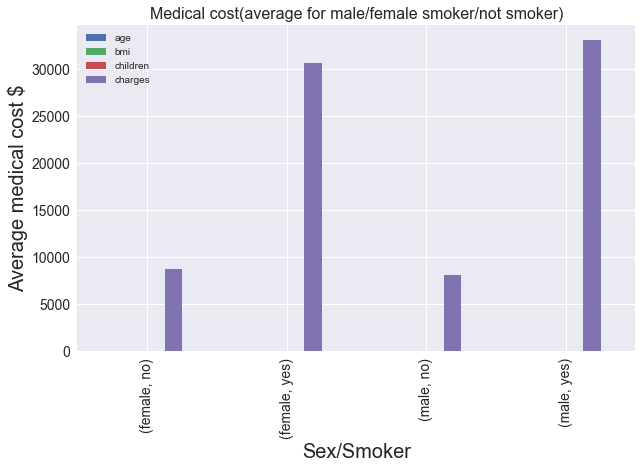

In [40]:
%matplotlib inline
plt.style.use("seaborn")
X = df.groupby(["sex","smoker"]).mean()
X.plot(kind = "bar", figsize = (10, 6), fontsize = 14)
plt.xlabel("Sex/Smoker", fontsize = 20)
plt.ylabel("Average medical cost $", fontsize = 20)
plt.title("Medical cost(average for male/female smoker/not smoker)", fontsize = 16)
plt.show()

From the graph above we can see a direct correlation to insurance cost among smokers and non smokers 

In [41]:
df.groupby(["region"]).size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

Changing String data into numaric data:

In [42]:
df = df.replace({'yes': 1 , 'no':0})
df = df.replace({'northeast': 0 , 'northwest': 1, 'southeast': 2, 'southwest': 3})
df = df.replace({'male' : 1 , 'female' : 0})

In [43]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Linear Regression:

In [68]:
y = df['charges']
X = df[['age','bmi','children','smoker','sex','region']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_)
print(list(zip(['age','bmi','children','smoker','sex','region'], linreg.coef_)))

-11074.74865855589
[('age', 252.0783081571687), ('bmi', 316.554730115887), ('children', 364.49255776294933), ('smoker', 24069.87438208202), ('sex', -270.1850952981235), ('region', -259.2312640940853)]


When taking all the features into consideration this will be our linear eqaution:

y = -11074.748 + 252.078 X age + 316.554 X bmi + 364.49 X children + 24069.87 X smoker - 270.18 X sex - 259.23 X region

#### Mean Absolute Error (MAE):

In [69]:
y_pred = linreg.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))

4019.636706785273


#### Mean Squared Error (MSE):

In [70]:
print(metrics.mean_squared_error(y_test, y_pred))

35807072.80613922


#### Root Mean Squared Error (RMSE):

In [71]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

5983.901136059922


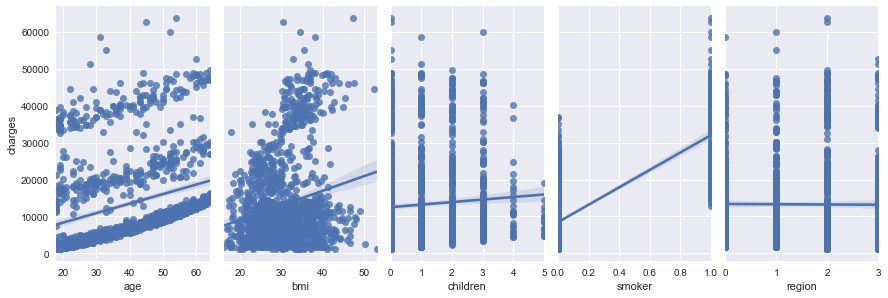

In [72]:
sns.pairplot(df, x_vars=['age','bmi','children','smoker','region'], y_vars='charges', height=4, aspect=0.6, kind='reg')

### Predicted Accuracy (R-squared) :
The coefficient of multiple determination for multiple regression

In [75]:
sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))

0.7338069544102044

From the results above we can see that our linear module has around 73.38% of accuarcy when it comes to predicting the insurance cost

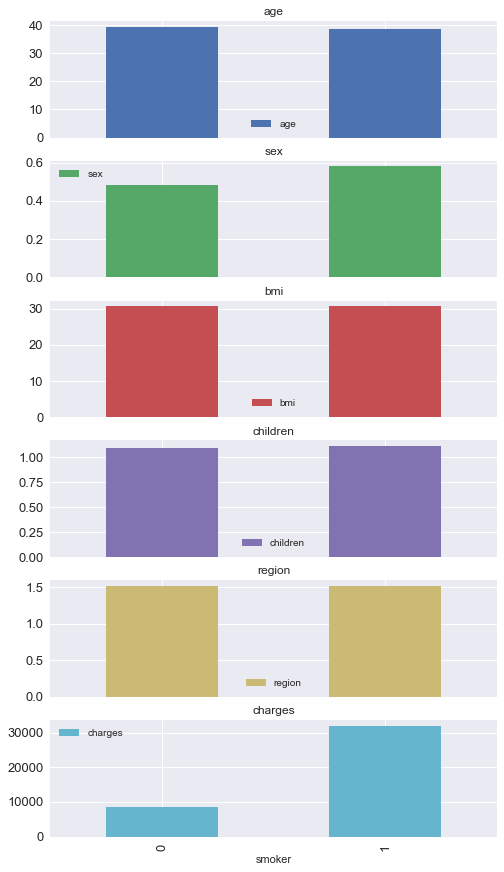

In [50]:
df.groupby('smoker').mean().plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

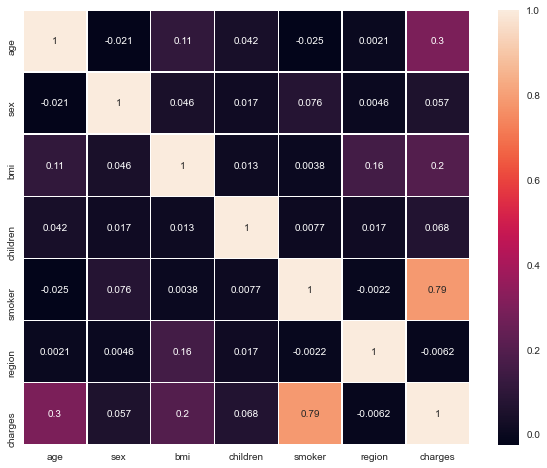

In [51]:
axes = plt.subplots(1, 1, figsize=(10, 8))
axes = sns.heatmap(df.corr(), annot=True , linewidths=0.5)

From the heat graph above we can see that the main features correlated to charges are : age , bmi , smoker , children

### Improving the module by taking the relevant data

In [87]:
X = df[['smoker','bmi','age','children']]
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
r2 = sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))
print("R-squared score :",r2)

R-squared score : 0.7952376940081072


### Using Polynomial Features for improvment:

In [94]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures()
x_pol = pol.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, random_state=0)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
r2 = sklearn.metrics.r2_score(np.array(y_test), np.array(y_pred))
print("R-squared score :",r2)

R-squared score : 0.8849604493599111
